In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('data/exam.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
hours    20 non-null float64
pass     20 non-null int64
dtypes: float64(1), int64(1)
memory usage: 400.0 bytes


In [4]:
df.describe()

,hours,pass
count,20.000000,20.000000
mean,2.787500,0.500000
std,1.507165,0.512989
min,0.500000,0.000000
25%,1.687500,0.000000
50%,2.625000,0.500000
75%,4.062500,1.000000
max,5.500000,1.000000


In [14]:
df.head()

,hours,pass
0,0.50,0
1,0.75,0
2,1.00,0
3,1.25,0
4,1.50,0


In [5]:
y = df[['pass']]
X = df.drop(['pass'], axis=1)


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [7]:
from sklearn.linear_model import LogisticRegression

In [8]:
lgr = LogisticRegression()

In [9]:
lgr.fit(X_train, y_train)

c:\program files\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\program files\python36\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [10]:
lgr.predict(X_test)

array([1, 1, 1, 0, 1, 0], dtype=int64)

In [16]:
X_test

,hours
4,1.50
5,1.75
11,3.00
1,0.75
14,4.00
2,1.00


In [17]:
y_test

,pass
4,0
5,0
11,0
1,0
14,1
2,0


In [12]:
lgr.predict_proba(X_test)

array([[0.48203089, 0.51796911],
       [0.44908138, 0.55091862],
       [0.29592874, 0.70407126],
       [0.58066876, 0.41933124],
       [0.19834615, 0.80165385],
       [0.54811162, 0.45188838]])

In [18]:
print('R2:', lgr.score(X_test, y_test))

R2: 0.5


In [19]:
yhat_train = lgr.predict(X_train)

In [20]:
yhat_test = lgr.predict(X_test)

In [21]:
from sklearn.metrics import accuracy_score

In [23]:
print(accuracy_score(y_train, yhat_train)*100, "%")

78.57142857142857 %


In [24]:
print(accuracy_score(y_test, yhat_test)*100, "%")

50.0 %


In [27]:
X_new = [[1.3],[4.0]]
y_new = lgr.predict(X_new)
y_new

array([0, 1], dtype=int64)

In [28]:
lgr.predict_proba(X_new)

array([[0.50851744, 0.49148256],
       [0.19834615, 0.80165385]])

In [29]:
lgr.coef_

array([[0.5299023]])

In [30]:
from scipy.stats import linregress

In [31]:
info = linregress(X['hours'].tolist(), y['pass'].tolist())
info

LinregressResult(slope=0.23459561219317931, intercept=-0.1539352689884873, rvalue=0.689243146277994, pvalue=0.0007751131598569146, stderr=0.058125622469009215)

In [33]:
info.slope

0.23459561219317931

In [32]:
import math

In [36]:
# hoc trong 4 gio
p = 1/(1 + math.exp(-(info.intercept + info.slope * 4)))
p

0.6866377906186065

In [37]:
X_new2 = np.linspace(0,6,1000).reshape(-1,1)
y_proba = lgr.predict_proba(X_new2)
y_proba.shape

(1000, 2)

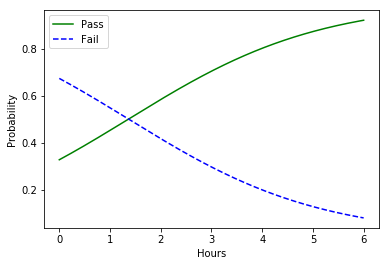

In [40]:
plt.plot(X_new2, y_proba[:,1], 'g-', label='Pass')
plt.plot(X_new2, y_proba[:,0], 'b--', label='Fail')
plt.legend()
plt.xlabel('Hours')
plt.ylabel('Probability')
plt.show()